<a href="https://colab.research.google.com/github/Akshadachavan02/EDA_Report_For_Traffic-prediction/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection Project

***Project idea-Fake news spreads like a wildfire and this is
a big issue in this era. You can use supervised learning to implement a model like this.***

In [ ]:
# important libraries for pre-processing
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#classifiers
from sklearn.linear_model import LogisticRegression


#classification reports
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

#warnings
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# stopwords ar those words which do not convey ant meaning
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
news_data = pd.read_csv("news.csv")

In [ ]:
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
# value counts in the label column
news_data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

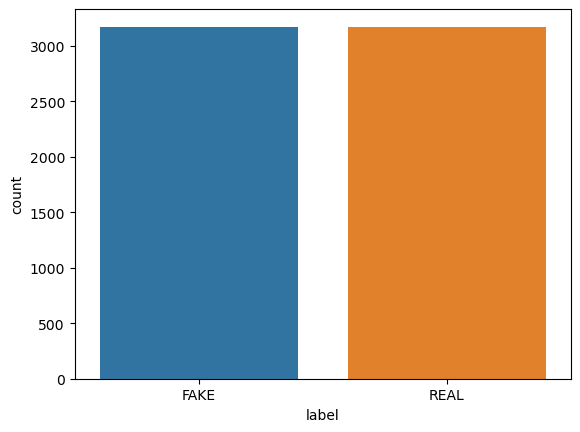

In [ ]:
sns.countplot(x="label",data=news_data)

In [ ]:
# lets check for null value
news_data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
news_data.shape

(6335, 4)

***seperating a datafor training annd trsting***

In [ ]:
X = news_data.drop("label",axis=1)
y = news_data["label"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 21)

In [ ]:
import contractions
def expand_contraction(text):
    text = contractions.fix(text)
    return text

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer() #initialising the lemmatizer function

In [ ]:
"""def my_normalizer(df):
  #lowercase the input text
  s = df.lower()

  #tokenize (split string into words)
  tokens = nltk.tokenize.word_tokenize(df)

  #remove short words less than or equal to 2
  tokens = [t for t in tokens if len(t) > 2]

  #lemmatazing words (put words into base form)
  tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]

  #remove stopwords
  tokens = [t for t in tokens if t not in set(stopwords.words('english'))]

  #remove digits
  tokens = [t for t in tokens if not any(c.isdigit() for c in t)]

  return tokens"""

"def my_normalizer(df):\n  #lowercase the input text\n  s = df.lower()\n\n  #tokenize (split string into words)\n  tokens = nltk.tokenize.word_tokenize(df)\n\n  #remove short words less than or equal to 2\n  tokens = [t for t in tokens if len(t) > 2]\n\n  #lemmatazing words (put words into base form)\n  tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]\n\n  #remove stopwords\n  tokens = [t for t in tokens if t not in set(stopwords.words('english'))]\n\n  #remove digits\n  tokens = [t for t in tokens if not any(c.isdigit() for c in t)]\n\n  return tokens"

In [ ]:
X_train['text'] = X_train['text'].apply(expand_contraction)

In [ ]:
#applying my_normalizer
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

*****Stemming***

In [ ]:
from nltk.stem.porter import PorterStemmer
import re

In [ ]:
stem = PorterStemmer()

In [ ]:
def stemming(text):
    stem_text = re.sub('[^a-zA-Z]',' ',text)
    stem_text = stem_text.lower()
    stem_text = stem_text.split()
    stem_text = [stem.stem(word) for word in stem_text if not word in stopwords.words('english')]
    stem_text = ' '.join(stem_text)
    return stem_text

In [ ]:
news_data['text'] = news_data['text'].apply(stemming)

In [ ]:
x = news_data['text'].values
y = news_data['label'].values

***conveting the text into numeric value***

In [ ]:
vect = TfidfVectorizer()
vect.fit(x)

X = vect.transform(x)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

***trainig the model into***

In [ ]:
y_pred_train = model.predict(X_train)
print(y_pred_train)

['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'REAL']


In [ ]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

        FAKE       0.97      0.94      0.95      2626
        REAL       0.94      0.97      0.95      2442

    accuracy                           0.95      5068
   macro avg       0.95      0.95      0.95      5068
weighted avg       0.95      0.95      0.95      5068



***************************model performance on unseen data***************************

In [ ]:
y_pred_test = model.predict(X_test)
print(y_pred_test)

['REAL' 'REAL' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']


In [ ]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

        FAKE       0.95      0.87      0.91       672
        REAL       0.86      0.95      0.90       595

    accuracy                           0.90      1267
   macro avg       0.91      0.91      0.90      1267
weighted avg       0.91      0.90      0.90      1267



#### Let's make a prediction System

In [ ]:
news_input = X_test[700]
predict = model.predict(news_input)

print(predict)

if predict[0] == 'REAL':
    print('the news is real')
else:
    print('the news is fake')

['REAL']
the news is real


## Hyperparameter Tunning

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Evaluate the model with best hyperparameters on the test set
best_logistic_regression = grid_search.best_estimator_
y_pred = best_logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters found:
{'C': 10, 'penalty': 'l2'}
Accuracy on test set: 0.9289660615627466
